## Introduction

The purpose of this notebook is to serve as a simple run of ridge regression on the Tecator data set. There will be a few main parts to this analysis:

1. Ridge regression on the entire 215-sample data set for visualization purposes.
2. Ridge regression using two nested grid searches: one to determine the optimal regularization parameter and one to evaluate fold-wise $R^{2}$.

We offload most of the computation to `scripts/02_ridge.py` and `src/models.py` and only pull in plots and results in this notebook.

## Imports

In [1]:
from IPython.display import Image
import os
from pathlib import Path
import pickle

## Run the script `scripts/02_ridge.py`

This script runs some ridge models and saves results for a quick analysis. Expect this script to run for a few minutes.

In [2]:
%run ../scripts/02_ridge.py

## TODO: pull full ridge alpha analysis from test notebook

## Evaluate repeated CV $R^{2}$

We now repeat a similar experiment as in the end of the notebook `01_ols.ipynb`. We run 10-fold CV ridge regression 10 times to get 100 different generalization $R^{2}$ estimates. This means for each of the 100 estimates, we have CV train and test sets. We take each train set and perform another 10-fold CV to choose the best regularization parameter $\alpha$, then evaluate ridge regression with this $\alpha$ on the test set. We report the mean, standard deviation, and boxplot of the 100 resulting $R^{2}$ values.

OLS CV R^2 mean: 0.9308
OLS CV R^2 standard deviation: 0.0773

Ridge CV R^2 mean: 0.965
Ridge CV R^2 standard deviation: 0.0152


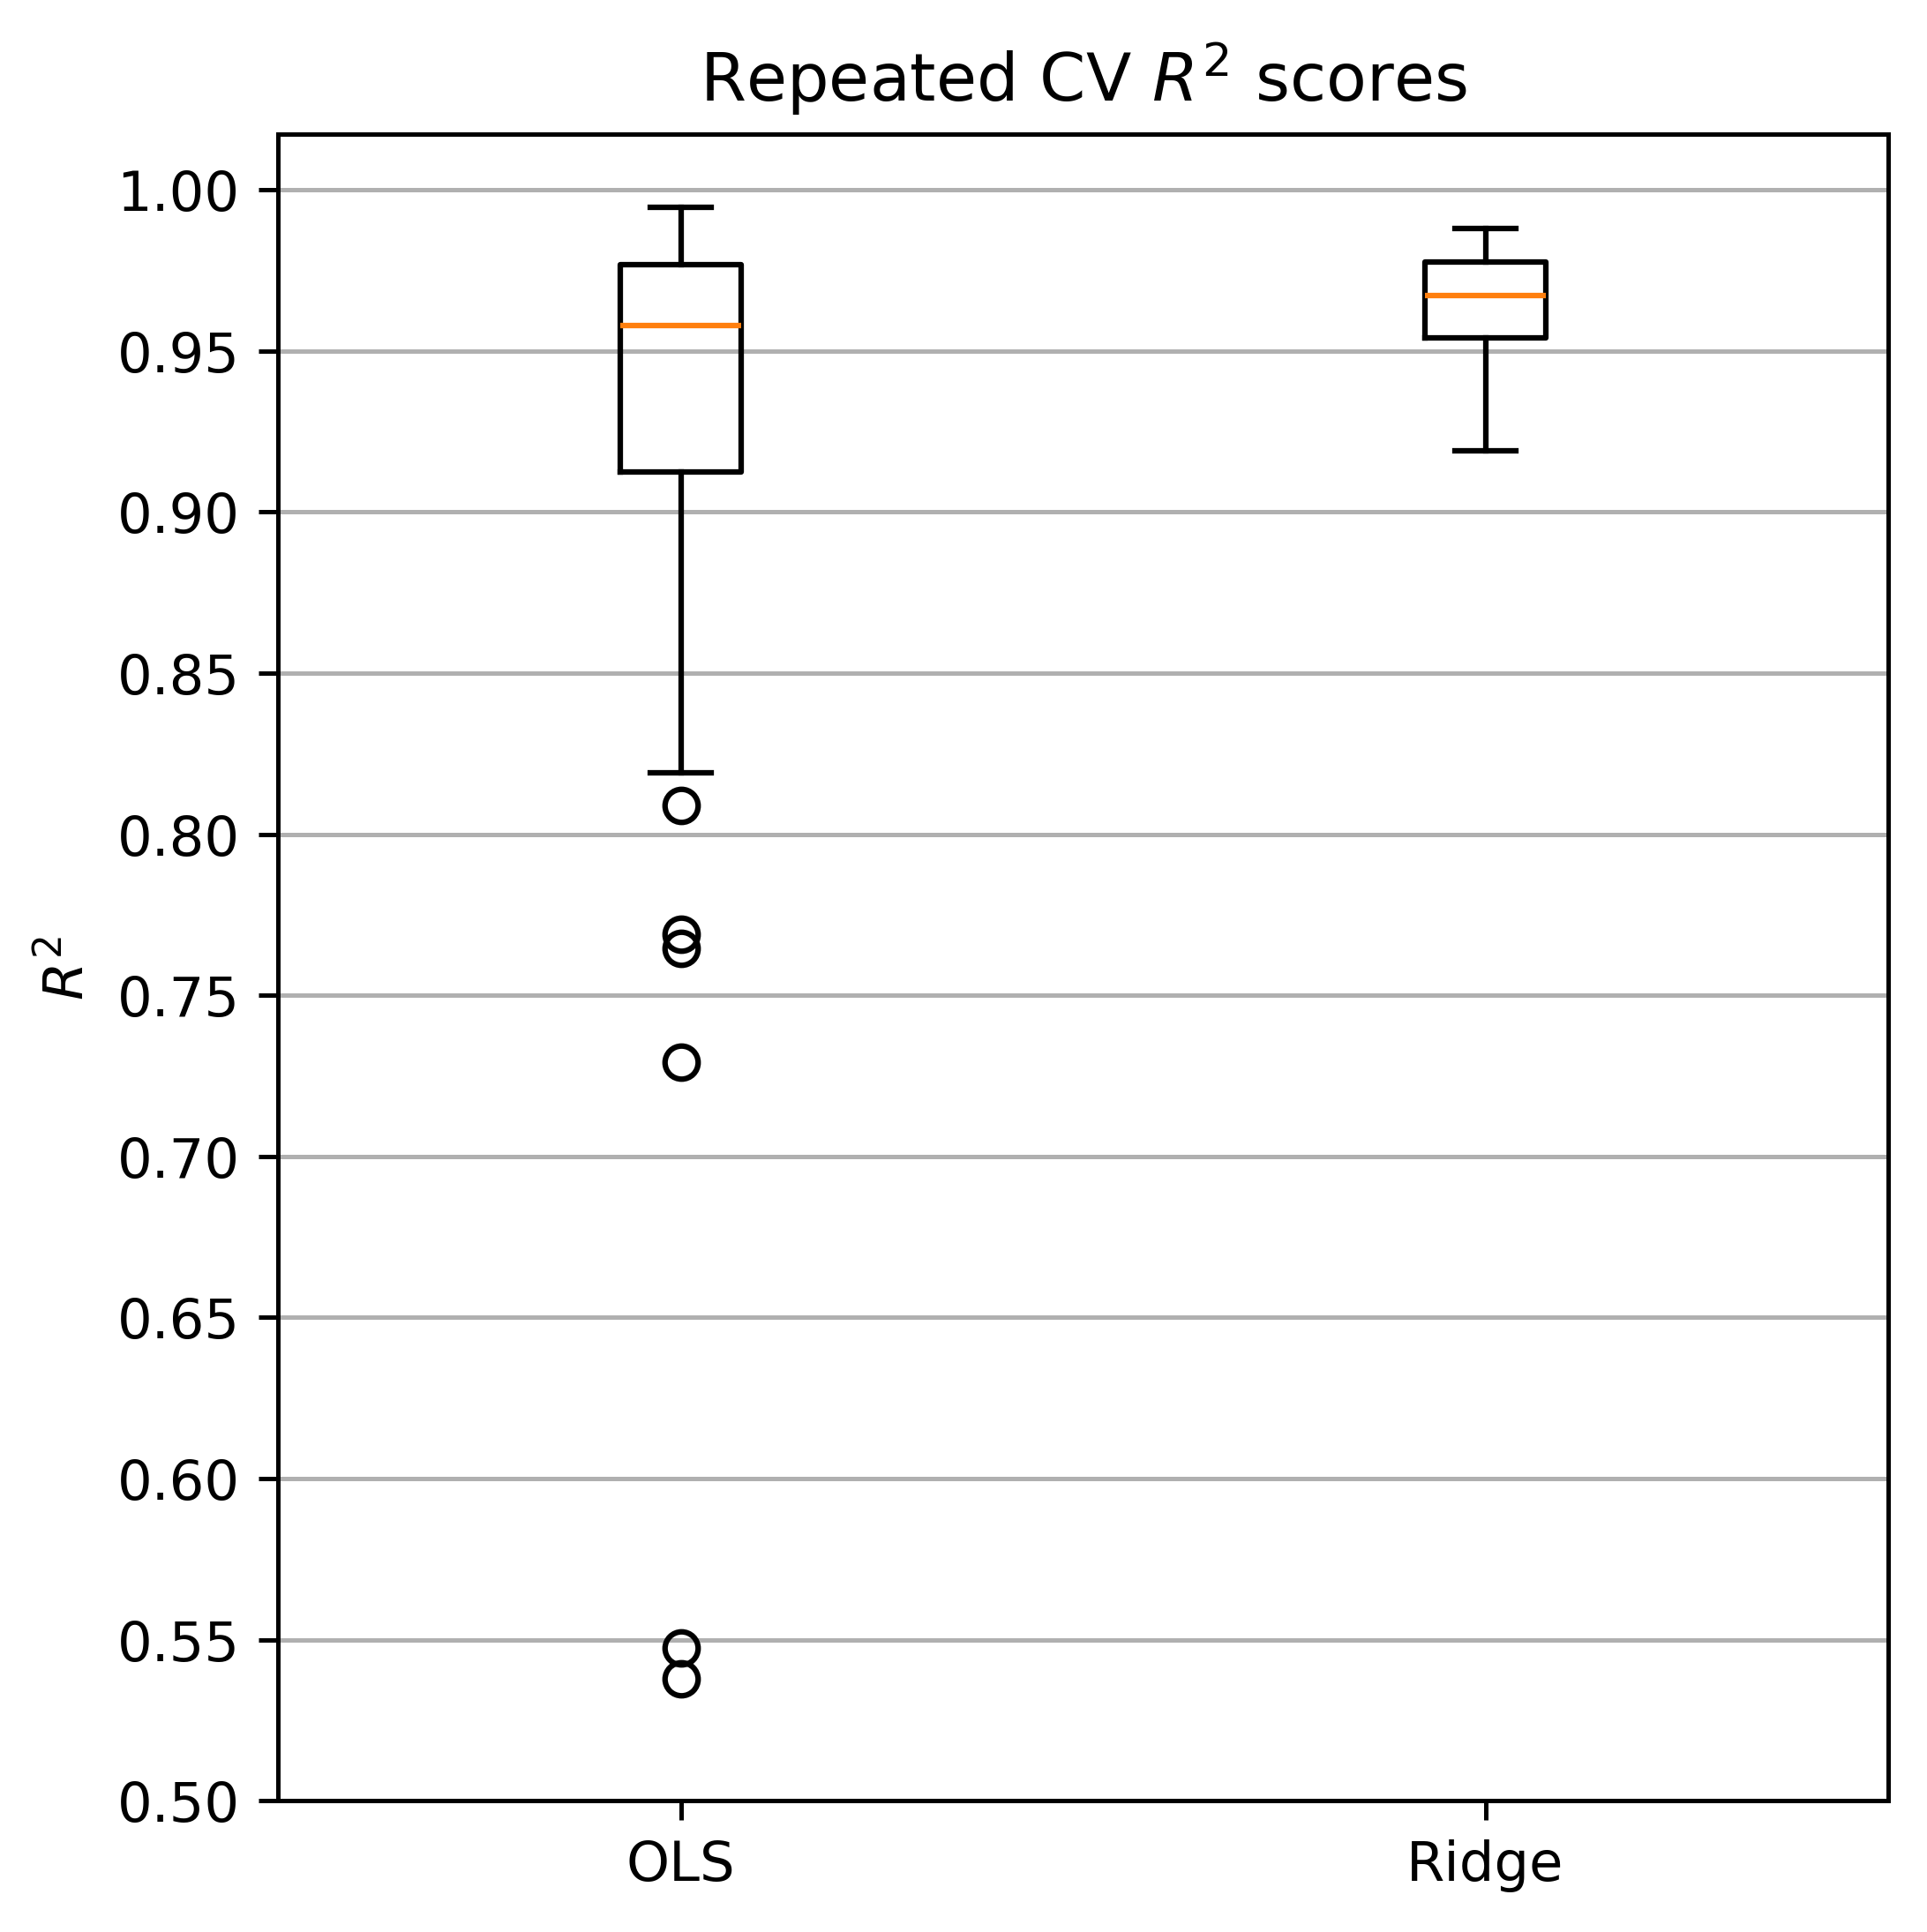

In [3]:
# Load the R^2 scores for both OLS and ridge.
with open(str((Path(os.getcwd()).parent / "data" / "01_ols" / "results" / "ols_cv.pkl")), "rb") as f: # We're currently in <repo>/notebooks/01_ols.ipynb, but we need to be in <repo>/data/01_ols.
    ols_cv_scores = pickle.load(f).r2_scores

with open(str((Path(os.getcwd()).parent / "data" / "02_ridge" / "repeated_cv_results" / "results.pkl")), "rb") as f: # We're currently in <repo>/notebooks/01_ols.ipynb, but we need to be in <repo>/data/01_ols.
    ridge_cv_scores = pickle.load(f)

print("OLS CV R^2 mean:", round(ols_cv_scores.mean(), 4))
print("OLS CV R^2 standard deviation:", round(ols_cv_scores.std(), 4))
print()
print("Ridge CV R^2 mean:", round(ridge_cv_scores.mean(), 4))
print("Ridge CV R^2 standard deviation:", round(ridge_cv_scores.std(), 4))

Image(filename="../data/02_ridge/plots/comparison.png", width=400)

Ridge regression does better! The mean is greater and the standard deviation is tighter.